#### Housing price in Beijing
* Housing price of Beijing from 2011 to 2017, fetching from `Lianjia.com`


#### Step 1: Data Collection




---



- The file was encoded in `GB2312` rather than `UTF-8` to expedite processing. The following code snippet accepts a file path and automatically determines the file's encoding using the `chardet` library.
- Subsequently, it creates a DataFrame named `df`.

In [2]:
import pandas as pd
import numpy as np

filePath = "/content/new.csv"

In [3]:
# Colab Notebook does not need to pip install it
# import chardet

# Detect the encoding of the file
# with open(filePath, 'rb') as f:
#     result = chardet.detect(f.read())

# Read the file with the detected encoding
# df = pd.read_csv(filePath, encoding=result['encoding'])

# Display the Encoding Type of csv
# print("Encoding Type:",result['encoding'])


To save your time, We ran it and found encoding is `GB2312` which had buch of `Chinese Characters` to be found.

In [4]:
df = pd.read_csv(filePath, encoding='GB2312')

<ipython-input-4-f08c35fea8c5>:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filePath, encoding='GB2312')


#### Step 2: Data Cleaning


---

- Upon inspecting columns of type `object` for unique categories, we discovered entries containing Chinese characters such as `低 6`, `中 6`, etc.
- We proceeded by translating and parsing these characters, creating new columns with their English equivalents.
- Subsequently, we addressed missing values. Once rid of the Chinese characters, we proceeded to drop some columns and adjust data types as necessary.

In [5]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016-08-09,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016-07-28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016-12-11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016-09-30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016-08-28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 26 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   url                  318851 non-null  object 
 1   id                   318851 non-null  object 
 2   Lng                  318851 non-null  float64
 3   Lat                  318851 non-null  float64
 4   Cid                  318851 non-null  int64  
 5   tradeTime            318851 non-null  object 
 6   DOM                  160874 non-null  float64
 7   followers            318851 non-null  int64  
 8   totalPrice           318851 non-null  float64
 9   price                318851 non-null  int64  
 10  square               318851 non-null  float64
 11  livingRoom           318851 non-null  object 
 12  drawingRoom          318851 non-null  object 
 13  kitchen              318851 non-null  int64  
 14  bathRoom             318851 non-null  object 
 15  floor            

In [7]:
# Removing url,id and community Id-Cid columns
df.drop(columns=['url','id','Cid'],inplace=True)

In [8]:
# Check for unique characters in categorical column

for i in df.columns:
  if df.loc[:,i].dtype == "object":
    print(df.loc[:,i].value_counts())
    print("="*20)

tradeTime
2016-02-28    1096
2016-03-06     948
2016-07-31     940
2016-08-31     910
2016-03-05     824
              ... 
2011-01-24       1
2011-01-26       1
2011-01-28       1
2011-02-15       1
2009-01-11       1
Name: count, Length: 2560, dtype: int64
livingRoom
2         83333
2         77256
1         42138
1         40248
3         36044
3         31567
4          3472
4          3349
5           570
5           537
6           126
6           102
#NAME?       32
7            22
0            17
7            15
0            11
8             4
8             3
9             3
9             2
Name: count, dtype: int64
drawingRoom
1       115876
1       109783
2        39084
2        33418
0        11300
0         8386
3          474
3          444
4           31
4           16
低 6          7
中 6          6
5            5
中 16         3
中 14         2
高 14         2
顶 6          2
5            2
中 15         1
低 16         1
高 12         1
低 15         1
高 6          1
底 28       

We have numerous Chinese characters to address, including:

---

**Living Room Column:**
- The `livingRoom` column contains entries labeled as `#NAME?`.

**Drawing Room and Floor Columns:**
- In the `drawingRoom` and `floor` columns, entries like `低 6`, `中 6`, etc., are present.

---

**Bathroom Column:**
- Values in the `bathRoom` column are labeled as `未知`.

**Construction Time Column:**
- Some entries in the `constructionTime` column are represented as `未知`, similar to the `bathRoom` column.

---

In [9]:
# It has 32 rows only
df.loc[df['livingRoom']=='#NAME?'].shape

(32, 23)

In [10]:
# Drop this rows
rowsToRemove = df.loc[df['livingRoom']=='#NAME?'].index
# print(rowsToRemove)

# removes those rows
df.drop(rowsToRemove,axis=0,inplace=True)


In [11]:
# check there is no entry left
df.loc[df['livingRoom']=='#NAME?'].shape

(0, 23)

Create a function named get_null_count that retrieves the count of null values for all columns in a DataFrame.




In [12]:
# Prints the count of null values for all columns

null_column_name = []

def get_null_count():
  for i in df.columns:
    if df.loc[:,i].isnull().sum() >0:
      null_column_name.append(i)
      print(f"{i} has {df.loc[:,i].isnull().sum()} Null Values.")

* Function to print `single_row_uique` for getting all unique categories in one line for all column (more readable).

In [13]:
def single_row_unique_val():
  for k in range(df.shape[1]): #produce output of single row
      if(df.iloc[:,k].dtype=="object"): #choose only those attributes with data type object
          print("{}: {}\n".format(df.columns[k],df.iloc[:,k].unique())) #print unique values from all columns in data set

single_row_unique_val()

tradeTime: ['2016-08-09' '2016-07-28' '2016-12-11' ... '2012-01-28' '2011-01-30'
 '2009-01-11']

livingRoom: [2 3 1 4 5 6 9 0 7 8 '1' '4' '3' '2' '5' '7' '9' '6' '0' '8']

drawingRoom: [1 2 0 4 3 5 '0' '1' '2' '3' '4' '5']

bathRoom: [1 2 3 0 4 5 6 7 '1' '2' '0' '3' '4' '5' '7']

floor: ['高 26' '高 22' '中 4' '底 21' '中 6' '中 8' '高 6' '高 10' '中 23' '底 11' '底 3'
 '高 24' '低 23' '中 19' '高 18' '低 25' '中 12' '中 14' '中 30' '中 27' '中 5'
 '低 18' '底 28' '中 11' '低 9' '顶 7' '顶 27' '低 6' '中 17' '顶 6' '中 24' '中 15'
 '底 5' '中 29' '顶 19' '顶 5' '中 9' '低 22' '顶 18' '低 16' '高 13' '高 9' '高 17'
 '底 6' '中 28' '低 26' '底 15' '高 16' '底 2' '低 7' '中 13' '低 33' '底 14' '高 15'
 '底 4' '顶 11' '中 32' '顶 16' '底 18' '顶 17' '低 14' '低 10' '底 20' '高 12'
 '低 31' '低 30' '低 19' '低 12' '中 10' '中 16' '顶 20' '底 19' '中 31' '低 13'
 '底 10' '高 25' '中 21' '中 20' '高 20' '低 21' '低 24' '顶 4' '高 21' '高 7'
 '中 22' '底 1' '中 7' '底 8' '顶 15' '中 18' '高 28' '顶 14' '顶 13' '低 20' '底 26'
 '低 17' '顶 24' '底 23' '顶 3' '顶 21' '底 24' '高 30' '高 11' '底 25

`livinRoom` , `drawingRoom` and `bathRoom` has no Chinese Character but `floor` and `constructionTime` does.

Approach1: Extract only floor number from `floor` column --> loss of important data

---


Approach2: The `floor` column contains information about the floor levels in `Chinese`, with the following patterns:

* "高" (high)
* "中" (middle)
* "底" (bottom)
* "低" (low)
* "顶" (top)
* "未知" (unknown)

In [14]:
# Approach 1
# let's extract the number from the string in floor column
# df['floor']= df['floor'].str.extract('(\d+)',expand=False)

In [15]:
# Approach2:

import re

# Function to translate and parse floor levels
def translate_and_parse_floor(floor_str):
    if isinstance(floor_str, str):
        floor_mapping = {
            '高': 'high',
            '中': 'middle',
            '底': 'bottom',
            '低': 'low',
            '顶': 'top',
            '未知': 'unknown'
        }

        # Extract the text part
        text_part = re.findall(r'[^\d\s]+', floor_str)

        # Extract the numerical part
        num_part = re.findall(r'\d+', floor_str)

        # Translate text part
        translated_text = floor_mapping[text_part[0]] if text_part else 'unknown'
        # Convert number part to integer
        floor_num = int(num_part[0]) if num_part else None

        return translated_text, floor_num
    else:
        return 'unknown', None

# Apply the function to the 'floor' column
df[['floor_category', 'floor_number']] = df['floor'].apply(lambda x: pd.Series(translate_and_parse_floor(x)))

# If needed, encode the 'floor_category' into numerical values
floor_category_mapping = {
    'bottom': 0,
    'low': 1,
    'middle': 2,
    'high': 3,
    'top': 4,
    'unknown': -1
}

df['floor_category_encoded'] = df['floor_category'].map(floor_category_mapping)


In [16]:
df.loc[:,['floor_category', 'floor_number' ,'floor_category_encoded','floor']]

,floor_category,floor_number,floor_category_encoded,floor
0,high,26,3,高 26
1,high,22,3,高 22
2,middle,4,2,中 4
3,bottom,21,0,底 21
4,middle,6,2,中 6
...,...,...,...,...
318846,middle,5,2,中 5
318847,middle,24,2,中 24
318848,middle,7,2,中 7
318849,middle,5,2,中 5


we'll drop `floor` and `floor_category` column after which we'll have `floor_number` and `floor_category_encoded`.

In [17]:
df.drop(columns=["floor","floor_category"],axis=1,inplace=True)

In [18]:
df.dtypes

Lng                       float64
Lat                       float64
tradeTime                  object
DOM                       float64
followers                   int64
totalPrice                float64
price                       int64
square                    float64
livingRoom                 object
drawingRoom                object
kitchen                     int64
bathRoom                   object
buildingType              float64
constructionTime           object
renovationCondition         int64
buildingStructure           int64
ladderRatio               float64
elevator                  float64
fiveYearsProperty         float64
subway                    float64
district                    int64
communityAverage          float64
floor_number                int64
floor_category_encoded      int64
dtype: object

`未知`  is a Chinese term that translates to `unknown` or `unidentified` in English.In the next step, we are replacing it with `nan` in `constructionTime` columns.



---

* Later we'll impute `missing/unknown/nan` data it.

In [19]:
df['constructionTime']=df['constructionTime'].str.extract('(\d+)',expand=False)

In [20]:
single_row_unique_val()

tradeTime: ['2016-08-09' '2016-07-28' '2016-12-11' ... '2012-01-28' '2011-01-30'
 '2009-01-11']

livingRoom: [2 3 1 4 5 6 9 0 7 8 '1' '4' '3' '2' '5' '7' '9' '6' '0' '8']

drawingRoom: [1 2 0 4 3 5 '0' '1' '2' '3' '4' '5']

bathRoom: [1 2 3 0 4 5 6 7 '1' '2' '0' '3' '4' '5' '7']

constructionTime: ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' nan '2012' '1989' '2003'
 '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979' '1981'
 '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987' '2015'
 '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963' '1967'
 '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944' '1972'
 '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906' '1934'
 '1914']




* The `pd.to_numeric` function converts arguments to numeric types, handling various cases like strings of numbers, missing values, etc.

* The `errors='coerce'` parameter tells the function to handle any errors in conversion by setting the problematic values to `NaN` (Not a Number).


In [21]:
df.loc[:,"livingRoom"] = pd.to_numeric(df.loc[:,"livingRoom"], errors='coerce')
df.loc[:,"drawingRoom"] = pd.to_numeric(df.loc[:,"drawingRoom"], errors='coerce')
df.loc[:,"bathRoom"] = pd.to_numeric(df.loc[:,"bathRoom"], errors='coerce')

In [22]:
single_row_unique_val()

tradeTime: ['2016-08-09' '2016-07-28' '2016-12-11' ... '2012-01-28' '2011-01-30'
 '2009-01-11']

livingRoom: [2 3 1 4 5 6 9 0 7 8]

drawingRoom: [1 2 0 4 3 5]

bathRoom: [1 2 3 0 4 5 6 7]

constructionTime: ['2005' '2004' '2008' '1960' '1997' '2009' '2006' '1991' '2001' '1990'
 '2011' '2000' '1998' '2010' '1996' '1993' '2002' nan '2012' '1989' '2003'
 '2007' '1994' '1984' '1992' '2014' '1985' '2013' '1999' '1979' '1981'
 '1976' '1982' '1975' '1983' '1986' '1995' '1965' '1988' '1987' '2015'
 '1955' '1980' '1978' '1958' '1970' '1956' '1977' '1964' '1963' '1967'
 '2016' '1974' '1973' '1959' '1954' '1962' '1966' '1957' '1944' '1972'
 '1971' '1953' '1968' '1961' '1950' '1952' '1933' '1969' '1906' '1934'
 '1914']



Finally, numbers are present and Chinese characters are gone.


---


Next step, handle missing values and set dtype appropriately.

In [23]:
get_null_count()

DOM has 157970 Null Values.
buildingType has 2021 Null Values.
constructionTime has 19283 Null Values.
communityAverage has 463 Null Values.


Handling Null Values


---



In [24]:
# Understanding the distribution
print("Descriptive statistics for DOM:")
print(df['DOM'].describe())

Descriptive statistics for DOM:
count    160849.000000
mean         28.826664
std          50.240049
min           1.000000
25%           1.000000
50%           6.000000
75%          37.000000
max        1677.000000
Name: DOM, dtype: float64


We can see the distribution has a large range (1 to 1677 days), with a mean of approximately 28.83 days and a median(50%) of 6 days. The high standard deviation (50.24) indicates significant variability.

To fill the null values in the DOM column, we can use the median (6 days) because it's less affected by outliers compared to the mean(around 29 days).

In [25]:
# Filling null values with the median
median_dom = df['DOM'].median()
df['DOM'].fillna(median_dom, inplace=True)

# Verify the imputation
print("\nDescriptive statistics after imputation:")
print(df['DOM'].describe())



Descriptive statistics after imputation:
count    318819.000000
mean         17.516396
std          37.465686
min           1.000000
25%           6.000000
50%           6.000000
75%           7.000000
max        1677.000000
Name: DOM, dtype: float64


In [26]:
get_null_count()

buildingType has 2021 Null Values.
constructionTime has 19283 Null Values.
communityAverage has 463 Null Values.


Now, for `buildingType` column

In [27]:
# Understanding the distribution
print(df['buildingType'].value_counts())

buildingType
4.0    172405
1.0     84541
3.0     59715
2.0       137
Name: count, dtype: int64


In [28]:
df['buildingType'].median()

4.0

Given that the `buildingType` column is an ordinal or categorical variable with a specific set of possible values (1, 2, 3, 4), and considering the median (4) is more representative of the central tendency without being affected by outliers or skewness, median imputation is often more appropriate for categorical data.



In [29]:
# Filling null values with the median
median_bt = df['buildingType'].median()
df['buildingType'].fillna(median_bt, inplace=True)


In [30]:
get_null_count()

constructionTime has 19283 Null Values.
communityAverage has 463 Null Values.


Now, for `constructionTime` column

In [31]:
# Understanding the distribution
print(df['constructionTime'].value_counts())

constructionTime
2004    21145
2003    19409
2005    18924
2006    14854
2007    14213
        ...  
1944        2
1934        2
1933        1
1906        1
1914        1
Name: count, Length: 71, dtype: int64


Given the `constructionTime` column, you are dealing with a categorical variable representing the year of construction. The counts indicate the frequency of properties built in each year. When deciding how to impute missing values in this context, the most common practice is to use the `mode` (the most frequent value).



In [32]:
# Finding the mode of constructionTime
mode_ct = df['constructionTime'].mode()[0]
# print(f"\nMode of constructionTime: {mode_ct}")

# Filling null values with the mode
df['constructionTime'].fillna(mode_ct, inplace=True)


In [33]:
get_null_count()

communityAverage has 463 Null Values.


`communityAverage` is left only.

In [34]:
# Understanding the distribution
print(df['communityAverage'].value_counts())

communityAverage
92360.0     1525
54263.0     1499
40934.0     1350
50205.0     1331
64222.0     1247
            ... 
37270.0        1
62427.0        1
80732.0        1
41678.0        1
130768.0       1
Name: count, Length: 4072, dtype: int64


For a continuous variable like `communityAverage`, common strategies for imputing missing values include using the mean or mediann imputation would typically be more appropriate than mode ,as the mode might not be representative of the central tendency in a highly continuous dataset.

we'll use `median`

In [35]:
# Filling null values with the median
median_ca = df['communityAverage'].median()
df['communityAverage'].fillna(median_ca, inplace=True)

In [36]:
get_null_count()

Setting up datatype


---



In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318819 entries, 0 to 318850
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Lng                     318819 non-null  float64
 1   Lat                     318819 non-null  float64
 2   tradeTime               318819 non-null  object 
 3   DOM                     318819 non-null  float64
 4   followers               318819 non-null  int64  
 5   totalPrice              318819 non-null  float64
 6   price                   318819 non-null  int64  
 7   square                  318819 non-null  float64
 8   livingRoom              318819 non-null  object 
 9   drawingRoom             318819 non-null  object 
 10  kitchen                 318819 non-null  int64  
 11  bathRoom                318819 non-null  object 
 12  buildingType            318819 non-null  float64
 13  constructionTime        318819 non-null  object 
 14  renovationCondition     3

In [38]:
df['tradeTime'] = pd.to_datetime(df['tradeTime'])

In [39]:
# Extract additional features
df['year'] = df['tradeTime'].dt.year
df['month'] = df['tradeTime'].dt.month
df['day'] = df['tradeTime'].dt.day
df['day_of_week'] = df['tradeTime'].dt.dayofweek
df['quarter'] = df['tradeTime'].dt.quarter

In [40]:
df.drop(columns=['tradeTime'],axis=1,inplace=True)

In [41]:
dtype_mapping = {
    "DOM": "int64",
    "livingRoom": "int64",
    "drawingRoom": "int64",
    "bathRoom": "int64",
    "buildingType": "object",
    "constructionTime": "int64",
    "renovationCondition": "object",
    "buildingStructure": "object",
    "elevator": "object",
    "fiveYearsProperty": "object",
    "subway": "object",
    "district": "int64"
}

# Convert columns to the specified data types
df = df.astype(dtype_mapping, errors='ignore')


In [42]:
df.dtypes

Lng                       float64
Lat                       float64
DOM                         int64
followers                   int64
totalPrice                float64
price                       int64
square                    float64
livingRoom                  int64
drawingRoom                 int64
kitchen                     int64
bathRoom                    int64
buildingType               object
constructionTime            int64
renovationCondition        object
buildingStructure          object
ladderRatio               float64
elevator                   object
fiveYearsProperty          object
subway                     object
district                    int64
communityAverage          float64
floor_number                int64
floor_category_encoded      int64
year                        int32
month                       int32
day                         int32
day_of_week                 int32
quarter                     int32
dtype: object

####  Step 3: Exporting DataFrame to a CSV file


---

Due to the possibility of unexpected disconnections in Google Colab, it's imperative to export our DataFrame and reload it to resume work from the last saved state, rather than repeating previous steps.



> **Note:**
>
> When importing data from a CSV file and creating a DataFrame, certain column data types may be automatically converted from `object` to `int64`. To maintain the original data types, it's necessary to remap them accordingly.


In [43]:
# Exporting DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)

#### Step 4: Creating Data Frame from our exported file


---
- Utilizing the `csv` file we have meticulously cleaned and stored, named `cleaned_data.csv`.
- Mapping columns to their specified data types.



In [44]:
import pandas as pd

cleaned_df = pd.read_csv('/content/cleaned_data.csv')

In [45]:
dtype_mapping2 = {
    "DOM": "int64",
    "livingRoom": "int64",
    "drawingRoom": "int64",
    "bathRoom": "int64",
    "buildingType": "object",
    "constructionTime": "int64",
    "renovationCondition": "object",
    "buildingStructure": "object",
    "elevator": "object",
    "fiveYearsProperty": "object",
    "subway": "object",
}

# Convert columns to the specified data types
cleaned_df = cleaned_df.astype(dtype_mapping2, errors='ignore')


In [46]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318819 entries, 0 to 318818
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Lng                     318819 non-null  float64
 1   Lat                     318819 non-null  float64
 2   DOM                     318819 non-null  int64  
 3   followers               318819 non-null  int64  
 4   totalPrice              318819 non-null  float64
 5   price                   318819 non-null  int64  
 6   square                  318819 non-null  float64
 7   livingRoom              318819 non-null  int64  
 8   drawingRoom             318819 non-null  int64  
 9   kitchen                 318819 non-null  int64  
 10  bathRoom                318819 non-null  int64  
 11  buildingType            318819 non-null  object 
 12  constructionTime        318819 non-null  int64  
 13  renovationCondition     318819 non-null  object 
 14  buildingStructure   

####  Step 5: Data Preprocessing


---


- Applied transformation based on skewness
- Removed outliers using the IQR method
- Applied StandardScaler and One-Hot Encoding

In [47]:
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer

def transform_skewed_features(df, numeric_columns, skew_threshold=0.5):

    transformed_df = df.copy()

    for col in numeric_columns:
        skewness = skew(df[col])

        # Apply Yeo-Johnson transformation for positively skewed features
        if skewness > skew_threshold:
            transformer = PowerTransformer(method='yeo-johnson')
            transformed_df[col] = transformer.fit_transform(df[[col]])

        # Apply square root transformation for negatively skewed features
        elif skewness < -skew_threshold:
            transformed_df[col] = np.sqrt(df[col])

    return transformed_df


In [48]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def preprocess_df(df):

    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # print("Categories columns: ",categorical_columns)

    # Outlier Handling using IQR method
    def handle_outliers(df, columns):
        for col in columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
            df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        return df

    # Apply outlier handling to numeric columns
    df = handle_outliers(df, numeric_columns)

    # Transform skewd features in order to reduce skewness
    df = transform_skewed_features(df, numeric_columns)

    # Normalization using StandardScaler
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

    # One-hot encode categorical columns
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_categorical = encoder.fit_transform(df[categorical_columns])
    encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

    # Combine numeric and encoded categorical columns
    df_encoded = pd.concat([df[numeric_columns].reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)

    return df_encoded,scaler

# These inputs are feature selected from `select_feature` step.
selected_inputs = cleaned_df.loc[:,['totalPrice', 'square', 'communityAverage', 'year']]


preprocessed_df,scalar = preprocess_df(selected_inputs)
preprocessed_df


,totalPrice,square,communityAverage,year
0,0.612197,1.425287,-0.175315,0.734184
1,1.321467,1.452784,0.564401,0.734184
2,1.972446,1.948876,-0.654749,0.734184
3,-0.044744,1.484701,-0.456213,0.734184
4,0.495037,0.164939,0.165364,0.734184
...,...,...,...,...
318814,0.267939,1.948876,-1.575653,0.734184
318815,-1.678101,-2.015271,-0.273887,0.734184
318816,0.318158,0.773322,-0.738738,0.734184
318817,1.851848,1.948876,-0.241722,0.734184


In [49]:
preprocessed_df.shape

(318819, 4)

In [50]:
cleaned_df.shape

(318819, 28)

- Initially, `35 independent columns` for `1 target column` ...
- After `feature selection`, only `4` inputs for `1` target column

#### Step 6: select_important_features


---

* We experimented with various methods to identify the best features.

* Best features = [ `totalPrice`, `square`, `communityAverage`, `year` ]

In [51]:
from sklearn.model_selection import train_test_split
X = preprocessed_df
y= cleaned_df.loc[:,'price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [52]:
X_train.shape,y_train.shape

((255055, 4), (255055,))

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

def select_important_features(X_train,y_train, threshold='mean'):

    # Initialize a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf.fit(X_train, y_train)

    # Use SelectFromModel to select important features
    selector = SelectFromModel(rf, threshold=threshold)
    selector.fit(X_train, y_train)

    # Get the selected features
    selected_features = X.columns[(selector.get_support())]

    return selected_features

selected_features = select_important_features(X_train,y_train)
print(f"Selected features using Random Forest Regressor: {selected_features}")

Selected features using Random Forest Regressor: Index(['totalPrice'], dtype='object')


In [54]:
print(len(selected_features))

1


In [57]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def select_important_features_rfecv(X_train, y_train):

    # Initialize a Linear Regression model
    model = LinearRegression()

    # Initialize RFECV
    rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')

    # Fit RFECV
    rfecv.fit(X_train, y_train)

    # Get the selected features
    selected_features = X_train.columns[rfecv.support_]

    return selected_features


selected_features = select_important_features_rfecv(X_train, y_train)
print(f"Selected features using RFECV: {selected_features}")
print(len(selected_features))

Selected features using RFECV: Index(['totalPrice', 'square', 'communityAverage', 'year'], dtype='object')
4


In [58]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

def select_important_features_lasso(X_train, y_train, alpha=0.1):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    model = SelectFromModel(lasso, prefit=True)
    selected_features = X_train.columns[(model.get_support())]

    return selected_features


selected_features = select_important_features_lasso(X_train, y_train)
print(f"Selected features using Lasso: {selected_features}")
print(len(selected_features))


Selected features using Lasso: Index(['totalPrice', 'square', 'communityAverage', 'year'], dtype='object')
4


#### Step 7: Train & Validate Models


---
- Linear Regression
- Random Forest Regressor


In [59]:
selected_cols = ['totalPrice', 'square', 'communityAverage', 'year']

# 31 featuers
# selected_cols = ['Lat', 'DOM', 'followers', 'totalPrice', 'square', 'livingRoom',
#        'constructionTime', 'ladderRatio', 'district', 'communityAverage',
#        'floor_number', 'floor_category_encoded', 'year', 'month', 'day',
#        'day_of_week', 'quarter', 'buildingType_2.0', 'buildingType_3.0',
#        'buildingType_4.0', 'renovationCondition_2', 'renovationCondition_3',
#        'renovationCondition_4', 'buildingStructure_2', 'buildingStructure_3',
#        'buildingStructure_4', 'buildingStructure_5', 'buildingStructure_6',
#        'elevator_1.0', 'fiveYearsProperty_1.0', 'subway_1.0']

In [60]:
from sklearn.model_selection import train_test_split

X = preprocessed_df # inputs
y = cleaned_df.loc[:,'price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [61]:
X_train.shape,y_train.shape

((255055, 4), (255055,))

In [62]:
X_test.shape,y_test.shape

((63764, 4), (63764,))

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def train_model(model_object):

  model_object.fit(X_train,y_train)
  return model_object

def validate_model_accuracy(model_object):

  #  Training
  model = train_model(model_object)

  y_true = y_test  # True target values from the test set
  y_pred = model.predict(X_test)  # Predicted target values

  # Calculate evaluation metrics
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)

  print("Mean Squared Error (MSE):", mse)
  print("Root Mean Squared Error (RMSE):", rmse)
  print("Mean Absolute Error (MAE):", mae)
  print("R-squared (R^2):", r2)

  print("="*20)

  return model

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

print("Validating Linear Regression model \n")
lr_model = validate_model_accuracy(LinearRegression())

print("Validating Random Forest model \n")
rf_model = validate_model_accuracy(RandomForestRegressor())

# rf model ==> we'll use 4 features only

# R-squared (R^2): 0.9892  for 4  features

Validating Linear Regression model 

Mean Squared Error (MSE): 59519459.99474472
Root Mean Squared Error (RMSE): 7714.885611254695
Mean Absolute Error (MAE): 4859.992794171368
R-squared (R^2): 0.8736122591554256
Validating Random Forest model 

Mean Squared Error (MSE): 5045655.024454571
Root Mean Squared Error (RMSE): 2246.25355301991
Mean Absolute Error (MAE): 507.0560402095244
R-squared (R^2): 0.9892857068985808


Overall, these  cross-validation results confirm that the `Random Forest model` is a highly accurate and reliable predictor for this dataset.


#### Step 8: Cross Validating Random Forest Regressor

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


rf_model_cv = RandomForestRegressor()

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf_model_cv, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive and calculate RMSE scores
cv_rmse_scores = np.sqrt(-cv_scores)

# Calculate the mean and standard deviation of RMSE scores
mean_rmse = np.mean(cv_rmse_scores)
std_rmse = np.std(cv_rmse_scores)

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE:", mean_rmse)
print("Standard Deviation of RMSE:", std_rmse)

# for 4 features on X_train,y_train
# Cross-Validation RMSE Scores: [4971.97950826 3024.98133586 1970.06810395 2025.23688025 2393.98990131]
# Mean RMSE: 2877.251145928217
# Standard Deviation of RMSE: 1112.8487706875699

Cross-Validation RMSE Scores: [4970.59144196 3034.36859914 1958.61345507 2020.75195447 2392.44699494]
Mean RMSE: 2875.354489114093
Standard Deviation of RMSE: 1115.281367136312


In [66]:
# Perform cross-validation with 5 folds for R-squared
cv_scores_r2 = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='r2')

# Calculate the mean and standard deviation of R-squared scores
mean_r2 = np.mean(cv_scores_r2)
std_r2 = np.std(cv_scores_r2)

print("Mean RMSE:", mean_rmse)
print("Cross-Validation R-squared Scores:", cv_scores_r2)
print("Mean R-squared:", mean_r2)
print("Standard Deviation of R-squared:", std_r2)

# for 4 features
# Mean RMSE: 2877.251145928217
# Cross-Validation R-squared Scores: [0.9549761  0.98772715 0.96230477 0.98040251 0.98692201]
# Mean R-squared: 0.9744665071669315
# Standard Deviation of R-squared: 0.013371644215400104

Mean RMSE: 2875.354489114093
Cross-Validation R-squared Scores: [0.95486945 0.98771055 0.96238315 0.98020303 0.98674192]
Mean R-squared: 0.9743816199064194
Standard Deviation of R-squared: 0.013334273417869193


In [67]:
X_train.head()

,totalPrice,square,communityAverage,year
15187,0.458420,-0.663763,0.641570,0.734184
42252,1.035270,-1.218104,1.516666,0.734184
4980,0.405287,1.295129,-1.384122,0.734184
202553,-0.047902,-0.511581,1.069352,0.130423
73892,0.874879,-1.208298,0.940360,1.337796


####  Step 9: Strategic Pivot


---


 - We achieved excellent results by using the `log_price` column instead of the `price` column with the Random Forest model.
 - Additionally, we reduced the number of estimators from 100 to just 10, making the model both lightweight and highly effective.

In [68]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df2 = pd.read_csv('/content/cleaned_data.csv').copy()


Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df2 = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]

# To avoid warning: SettingWithCopyWarning
df2 = df2.copy()

# Apply log transformation to the target variable
df2.loc[:,'log_price'] = np.log(df2.loc[:,'price'])

# Save with 4 input and 1 target columns as filtered_data.csv
filt_dataframe = df2.loc[:,['totalPrice', 'square', 'communityAverage', 'year','log_price']]
filt_dataframe.to_csv('filtered_data.csv',index=False)

Here, we have exported `filtered data` as `filtered_data.csv` and used as data frame in next step.



In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train on filtered 5 columns only
filtered_df = pd.read_csv('/content/filtered_data.csv')

# Use 'log_price' for training and then transform predictions back to the original scale
X = filtered_df.loc[:,['totalPrice', 'square', 'communityAverage', 'year']]
y = filtered_df.loc[:,'log_price']

X_train,X_test,y_train,y_test = train_test_split(X,y)

# Train the model
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)


# Make predictions
predicted_log_price = model.predict(X_test)

# Transform predictions back to the original scale
predicted_price = np.exp(predicted_log_price)

# Also transform the true values back to the original scale
true_price = np.exp(y_test)

# Calculate evaluation metrics
mse = mean_squared_error(true_price, predicted_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true_price, predicted_price)
r2 = r2_score(true_price, predicted_price)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R^2): {r2}")


Mean Squared Error (MSE): 478787.55028029287
Root Mean Squared Error (RMSE): 691.9447595583717
Mean Absolute Error (MAE): 230.52023024516035
R-squared (R^2): 0.9984528629791923


Summary of Metrics by Number of Estimators


---



| Estimators | MSE        | RMSE     | MAE        | R²          |
|------------|------------|----------|------------|-------------|
| 5          | 430,336.21 | 656.00   | 246.82     | 0.9985      |
| 8          | 479,481.66 | 692.45   | 239.80     | 0.9983      |
| 10         | 269,175.29 | 518.82   | 186.05     | 0.9991      |
| 13         | 433,258.34 | 658.22   | 215.96     | 0.9985      |
| 15         | 297,318.47 | 545.27   | 185.02     | 0.9990      |
| 16         | 423,048.52 | 650.42   | 208.17     | 0.9985      |
| 20         | 413,638.79 | 643.15   | 200.96     | 0.9986      |
| 32         | 317,560.38 | 563.52   | 175.89     | 0.9989      |
| 64         | 314,188.00 | 560.52   | 166.09     | 0.9989      |
| 100        | 459,565.88 | 677.91   | 177.27     | 0.9985      |



---


- The model with `10 estimators` appears to be the optimal choice based on the balance of all metrics, particularly excelling in MSE, RMSE, and maintaining a high R².
- The models with higher numbers of estimators (such as 64 and 100) do not significantly improve performance and may even degrade it, especially in terms of RMSE and R².



In [70]:
# Check for any random test values and plotting 10k random points

# Initialize lists to store actual and predicted values
actual_values = []
predicted_values = []

for i in range(0,10000):
  random_idx = np.random.randint(1,y_test.shape[0])

  actual =  int(np.exp(y_test.iloc[random_idx]))
  prediction = int(predicted_price[random_idx])

  actual_values.append(actual)
  predicted_values.append(prediction)

  diff = abs(actual - prediction)
  if i % 1000 ==0:
    print(f"Actual: {actual} | Prediction: {prediction} | difference: {diff}")

Actual: 23483 | Prediction: 23549 | difference: 66
Actual: 52840 | Prediction: 52738 | difference: 102
Actual: 60915 | Prediction: 61148 | difference: 233
Actual: 44543 | Prediction: 44457 | difference: 86
Actual: 11034 | Prediction: 10865 | difference: 169
Actual: 52428 | Prediction: 54060 | difference: 1632
Actual: 31968 | Prediction: 31921 | difference: 47
Actual: 35907 | Prediction: 35899 | difference: 8
Actual: 24805 | Prediction: 24776 | difference: 29
Actual: 24380 | Prediction: 24308 | difference: 72


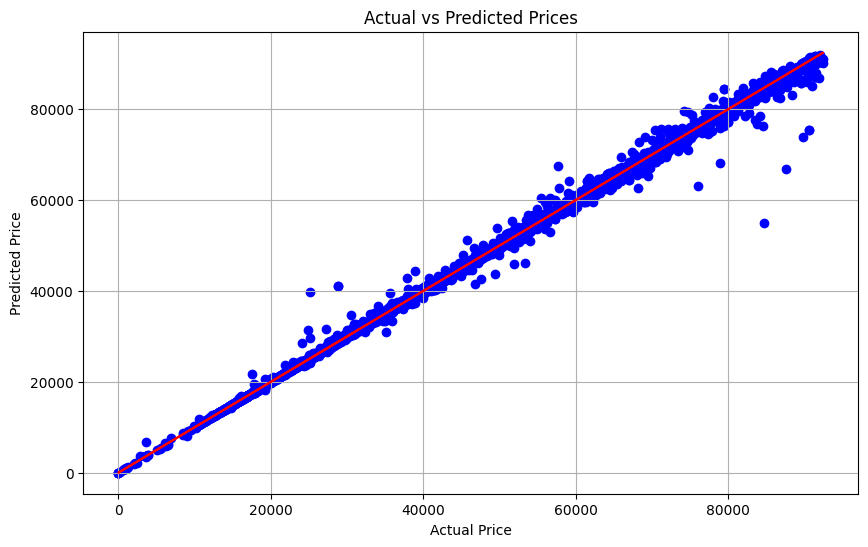

In [71]:
import numpy as np
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue')
plt.plot(actual_values, actual_values, color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

### Step 10: Export Model


---
We have exported a Random Forest model with 10 estimators, configured to take four input features and predict the price.


In [72]:
# Storing Good Model
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(model, file)